In [1]:
import pandas as pd
import numpy as np

survey= pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv', low_memory=False)
survey.head(5)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

survey['JobRoleInterest'].value_counts(normalize= True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

In [3]:
interest_nonnull= survey['JobRoleInterest'].dropna()
split_interests= interest_nonnull.str.split(',')
#We drop the null values and split the strings as the commas denote multiple interests
split_interests= split_interests.apply(lambda x: len(x))
split_interests.value_counts(normalize= True)

1     0.316505
3     0.158896
4     0.152174
5     0.120423
2     0.108839
6     0.067220
7     0.038616
8     0.017592
9     0.009868
10    0.004720
12    0.003003
11    0.001859
13    0.000286
Name: JobRoleInterest, dtype: float64

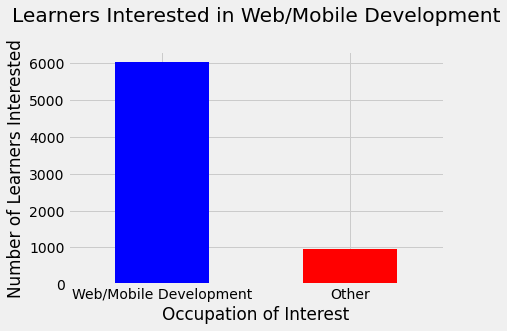

In [4]:
#Now we will see how many people are interested in web and mobile development
Interest= survey['JobRoleInterest'].dropna().str.contains('Web Developer|Mobile Developer')
freq_Interest= Interest.value_counts()

plt.style.use('fivethirtyeight')
freq_Interest.plot.bar(color= ['Blue', 'Red'])
plt.xlabel('Occupation of Interest')
plt.ylabel('Number of Learners Interested')
plt.xticks(rotation= 0, ticks=[0,1], labels=['Web/Mobile Development', 'Other'])
plt.title('Learners Interested in Web/Mobile Development', y=1.1)
plt.show()


We can see that the overwhelming majority of learners are interested in Web/Mobile Development. 

In [5]:
survey_interest= survey[survey['JobRoleInterest'].isnull()==False].copy()
survey_interest['CountryLive'].value_counts()

United States of America    3125
India                        528
United Kingdom               315
Canada                       260
Poland                       131
                            ... 
Liberia                        1
Papua New Guinea               1
Guadeloupe                     1
Gibraltar                      1
Gambia                         1
Name: CountryLive, Length: 137, dtype: int64

In [6]:
survey_interest['CountryLive'].value_counts(normalize= True)
interest_by_country= pd.DataFrame(index= survey_interest['CountryLive'].value_counts().index)
interest_by_country['Absolute Frequency']= survey_interest['CountryLive'].value_counts()
interest_by_country['Relative Frequency']= survey_interest['CountryLive'].value_counts(normalize=True)
interest_by_country.head(12)

,Absolute Frequency,Relative Frequency
United States of America,3125,0.457005
India,528,0.077216
United Kingdom,315,0.046066
Canada,260,0.038023
Poland,131,0.019158
Brazil,129,0.018865
Germany,125,0.018280
Australia,112,0.016379
Russia,102,0.014917
Ukraine,89,0.013016


We see that the United States of America has the highest frequency of survey respondents by far, but since the frequency other countries are close in size, we should investigate other factors to determine the best contries to market to. 

In [7]:
survey_interest['MonthsProgramming']= survey_interest['MonthsProgramming'].replace(0,1)
survey_interest['Money_per_month']= survey_interest['MoneyForLearning']/survey_interest['MonthsProgramming']
survey_interest['Money_per_month'].isna().sum()

survey_interest= survey_interest[survey_interest['Money_per_month'].notnull()]
survey_interest= survey_interest[survey_interest['CountryLive'].notnull()]

grouped= survey_interest.groupby(['CountryLive'])
grouped_mean= grouped['Money_per_month'].mean()
grouped_mean[['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Money_per_month, dtype: float64

It seems strange that the amount of money per month for the United Kindom and Canada are so much lower than India. This indicated that there could be outliers in the data or that out populations are not representative of their home countries. 

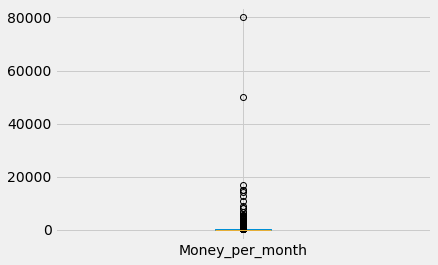

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_per_month
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,6500.000000
2478,38.0,1.0,0.0,1.0,NaN,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50000.000000
3184,34.0,1.0,1.0,0.0,We Can Code IT,1.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9000.000000
3930,31.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,NaN,various conf presentations,NaN,NaN,10833.333333
6805,46.0,1.0,1.0,1.0,Sabio.la,0.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15000.000000
7198,32.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,1.0,NaN,...,NaN,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,14000.000000
7505,26.0,1.0,0.0,1.0,Codeup,0.0,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,6666.666667
9778,33.0,1.0,0.0,1.0,Grand Circus,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
14024,45.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,80000.000000


In [8]:
grouped.get_group('United States of America')['Money_per_month'].plot.box()
plt.show()
USA= grouped.get_group('United States of America')
USA[USA['Money_per_month']>=6000]

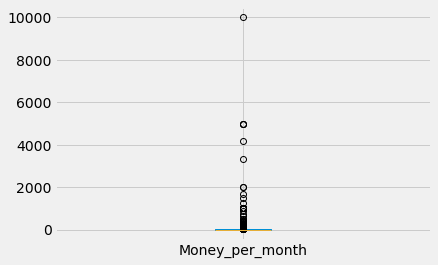

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_per_month
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,3333.333333
7989,28.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
8126,22.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,5000.000000
13398,19.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10000.000000
15587,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,4166.666667


In [9]:
grouped.get_group('India')['Money_per_month'].plot.box()
plt.show()
India= grouped.get_group('India')
India_outliers= India[India['Money_per_month']>=3000]
India_outliers.head(6)

We can see that none of the outliers in India have attended a bootcamp, so it's hard to justify their outsized spending and we will drop them from our dataset. 

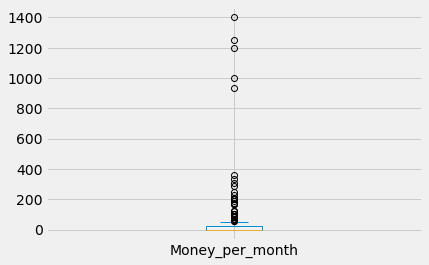

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_per_month
3645,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1200.00
6127,23.0,1.0,1.0,1.0,General Assembly,1.0,NaN,more than 1 million,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250.00
8948,40.0,1.0,1.0,0.0,NaN,1.0,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1400.00
13345,25.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,936.75
16552,37.0,0.0,NaN,NaN,NaN,NaN,1.0,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1000.00


In [10]:
grouped.get_group('United Kingdom')['Money_per_month'].plot.box()
plt.show()
UK= grouped.get_group('United Kingdom')
UK[UK['Money_per_month']>=400]

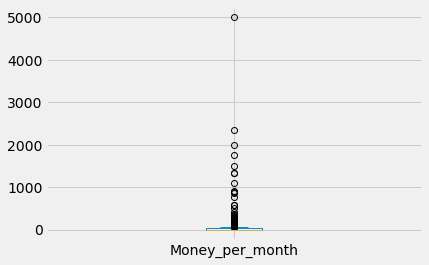

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Money_per_month
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


In [11]:
grouped.get_group('Canada')['Money_per_month'].plot.box()
plt.show()
Canada= grouped.get_group('Canada')
Canada[Canada['Money_per_month']>=4000]
Canada_outliers= Canada[Canada['Money_per_month']>=4000]
Canada_outliers.head()

Above we have made boxplots to find any extreme outliers in our datasets. To see if their spending could be justified, we investigated whether or not they have completed a bootcamp. Otherwise, the values were dropped from our dataset. 

In [12]:
no_bootcamp = survey_interest[
    (survey_interest['CountryLive'] == 'United States of America') & 
    (survey_interest['Money_per_month'] >= 6000) &
    (survey_interest['AttendedBootcamp'] == 0)
]

survey_interest = survey_interest.drop(no_bootcamp.index)


# Here we removed the respondents that had been programming for less than 3 months
less_than_3_months = survey_interest[
    (survey_interest['CountryLive'] == 'United States of America') & 
    (survey_interest['Money_per_month'] >= 6000) &
    (survey_interest['MonthsProgramming'] <= 3)
]

survey_interest = survey_interest.drop(less_than_3_months.index)

Above, we remove programmers who have not attended a bootcamp but have spent a significant amount of money, and we have removed all respondents who have been programming for less than 3 months. This will ensure that we are only looking at customers who have put a significant amount of time into programming, and who have "normal" spending habits.

In [13]:
india_outliers = survey_interest[
    (survey_interest['CountryLive'] == 'India') & 
    (survey_interest['Money_per_month'] >= 2500)]
india_outliers

survey_interest= survey_interest.drop(india_outliers.index)

In [14]:
canada_outliers = survey_interest[
    (survey_interest['CountryLive'] == 'Canada') & 
    (survey_interest['Money_per_month'] > 4500)]
canada_outliers

survey_interest= survey_interest.drop(canada_outliers.index)

In [21]:
top_4= survey_interest[(survey_interest['CountryLive']=='United States of America') | (survey_interest['CountryLive']=='India') | (survey_interest['CountryLive']=='United Kingdom') | (survey_interest['CountryLive']=='Canada')]
top_4.groupby('CountryLive').mean()['Money_per_month']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: Money_per_month, dtype: float64

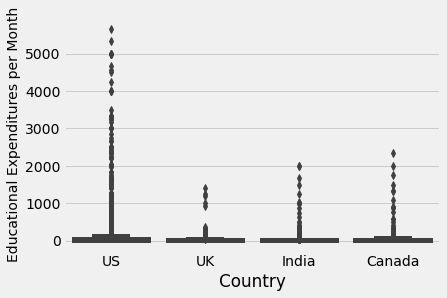

In [33]:
import seaborn as sns

figure= sns.boxplot(data= top_4, x= 'CountryLive', y='Money_per_month')
plt.xticks([0, 1, 2, 3], ['US', 'UK', 'India', 'Canada'])
plt.xlabel('Country')
plt.ylabel('Educational Expenditures per Month', fontsize= 14)
plt.show()

In [35]:
top_4['CountryLive'].value_counts(normalize= True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

At this point, we can conclude that the majority of marketing efforts should be focused in the United States, and that a smaller portion of our resources should be directed twords India and Canada. 